# 图像分割
1. 熟悉边缘检测基本原理，掌握边缘检测图像分割Python使用方法；
2. 熟悉阈值分割基本原理，掌握图像阈值分割Python使用方法；
3. 熟悉区域分割基本原理，掌握图像区域分割Python使用方法。

## 固定阈值图像分割

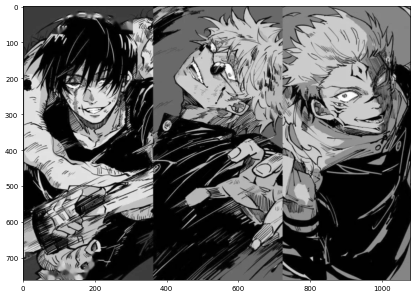

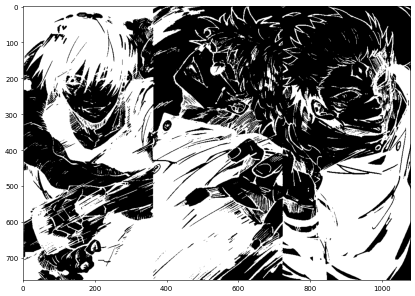

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
def grey_show(img,name="",dpi=120):
    plt.figure(dpi=dpi,figsize=(10,8))
    plt.imshow(img,cmap="gray")
    print(name)
    plt.show()
img = cv2.imread('fight.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 二值化
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
grey_show(gray,dpi=50)
grey_show(thresh,dpi=50)

## 自适应阈值法-cv2.adaptiveThreshold()
函数:cv2.adaptiveThreshold() 

参数说明:  
参数1:要处理的原图  
参数2:最大阈值，一般为255  
参数3:小区域阈值的计算方式  
ADAPTIVE_THRESH_MEAN_C:小区域内取均值  
ADAPTIVE_THRESH_GAUSSIAN_C:小区域内加权求和，权重是个高斯核  
参数4:阈值方式(跟前面讲的那5种相同)  
参数5:小区域的面积，如11就是11*11的小块  
参数6:最终阈值等于小区域计算出的阈值再减去此值  

特定:自适应阈值会每次取图片的一小部分计算阈值，这样图片不同区域的阈值就不尽相同，适用于明暗分布不均的图片。  



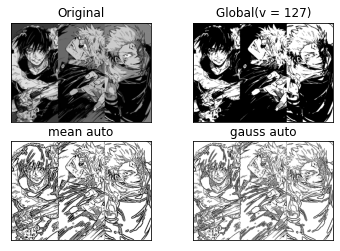

In [3]:
# ---------------------------------自适应阈值分割---------------------------------
img = cv2.imread('fight.png', 0)

# 固定阈值
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 自适应阈值
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)

# 全局阈值，均值自适应，高斯加权自适应对比
titles = ['Original', 'Global(v = 127)', 'mean auto', 'gauss auto']
images = [img, thresh1, thresh2, thresh3]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


### 边缘检测算法

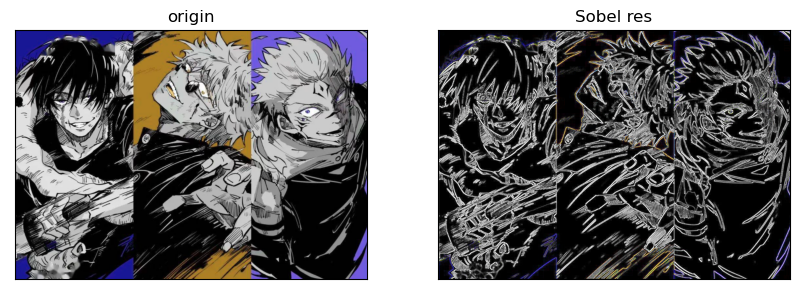

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 1 读取图像
img = cv2.imread("fight.png")
# 2 计算Sobel卷积结果
x = cv.Sobel(img, cv.CV_16S, 1, 0)
y = cv.Sobel(img, cv.CV_16S, 0, 1)
# 3 将数据进行转换
Scale_absX = cv.convertScaleAbs(x)  # convert 转换  scale 缩放
Scale_absY = cv.convertScaleAbs(y)
# 4 结果合成
result = cv.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
# 5 图像显示
plt.figure(figsize=(10,8),dpi=100)
plt.subplot(121),plt.imshow(img,cmap=plt.cm.gray),plt.title('origin')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result,cmap = plt.cm.gray),plt.title('Sobel res')
plt.xticks([]), plt.yticks([])
plt.show()

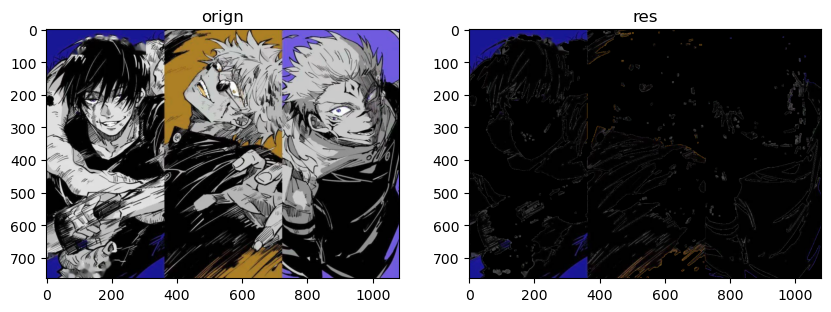

In [5]:
kernel = np.ones((3,3),np.uint8)
# 开运算
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# mask蒙版
mask=Image.fromarray(np.uint8(opening)).convert('RGB')
mask=np.array(mask)
res=cv2.bitwise_and(img, mask)

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img,'gray')
axes[0].set_title("orign")
axes[1].imshow(res,'gray')
axes[1].set_title("res")
plt.show()